#  PanSTARRS - WISE reddening

Apply the reddenign to the relevant magnitudes of our samples. This is done before computing the $Q_0$ or applying the ML cross-matching.

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
from mltier1 import Field
from extinction import FILTER_EXT, get_eb_v

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
field = Field(170.0, 190.0, 45.5, 56.5)
field_full = Field(160.0, 232.0, 42.0, 62.0)

## Load the data

### Load the catalogues

In [6]:
panstarrs = Table.read("panstarrs_u1.fits")

In [7]:
wise = Table.read("wise_u1.fits")

### Coordinates

As we will use the coordinates to retrieve the extinction in their positions

In [8]:
coords_panstarrs = SkyCoord(panstarrs['raMean'], panstarrs['decMean'], unit=(u.deg, u.deg), frame='icrs')

In [8]:
coords_wise = SkyCoord(wise['raWise'], wise['decWise'], unit=(u.deg, u.deg), frame='icrs')

## Reddening

Get the extinction for the positions of the sources in the catalogues.

In [22]:
ext_panstarrs = get_eb_v(coords_panstarrs.ra.deg, coords_panstarrs.dec.deg)

100%|██████████| 60/60 [13:29<00:00, 13.59s/it]


In [9]:
ext_wise = get_eb_v(coords_wise.ra.deg, coords_wise.dec.deg)

100%|██████████| 30/30 [05:51<00:00, 11.42s/it]


Apply the correction to each position

In [24]:
i_correction = ext_panstarrs * FILTER_EXT["i"]

In [10]:
w1_correction = ext_wise * FILTER_EXT["W1"]

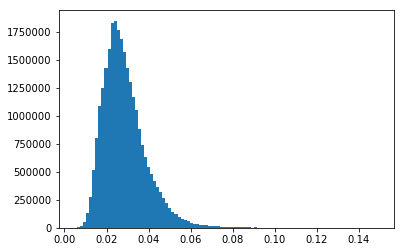

In [32]:
hist(i_correction, bins=100);

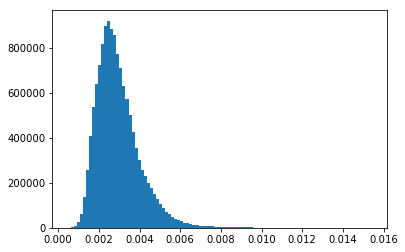

In [11]:
hist(w1_correction, bins=100);

In [ ]:
panstarrs.rename_column("i", 'iUncor')

In [12]:
wise.rename_column("W1mag", 'W1magUncor')

In [27]:
panstarrs["i"] = panstarrs["iUncor"] - i_correction

In [13]:
wise["W1mag"] = wise["W1magUncor"] - w1_correction

## Save the corrected catalogues
### PanSTARRS

In [34]:
columns_save = ['objID', 'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'i', 'iErr']

In [35]:
panstarrs[columns_save].write('panstarrs_u2.fits', format="fits")

In [36]:
panstarrs["ext"] = ext_panstarrs

In [37]:
panstarrs[['objID', "ext"]].write('panstarrs_extinction.fits', format="fits")

In [41]:
# Free memory
del panstarrs

### WISE

In [14]:
columns_save = ['AllWISE', 'raWise', 'decWise', 'raWiseErr', 'decWiseErr', 'W1mag', 'W1magErr']

In [15]:
wise[columns_save].write('wise_u2.fits', format="fits")

In [16]:
wise["ext"] = ext_wise

In [17]:
wise[['AllWISE', "ext"]].write('wise_extinction.fits', format="fits")